# Data Cleaning & Preprocessing I

In [23]:
# Import necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.stats import pearsonr, chi2_contingency

# Step 1: Data Loading and Preprocessing
# 1.1 Load the survey data into a pandas DataFrame
# Replace 'survey_data.csv' with the path to your data file
data = pd.read_excel('responses.xlsx')
#test
# Create a copy of the data to preserve the original
df = data.copy()

# Step 1.2: Data Cleaning as per your instructions

# Define the relevant column names for ease of reference
initial_choice_col = 'Which SWOT analysis do you prefer based on content alone?'
stick_to_choice_col = 'Now that you know which SWOT analysis was generated by FinBot (AI) and which by a human, do you stick to your original choice?'
reason_change_col = 'If you changed your choice, why did you decide to change?'

# Data cleaning function for 'Reason for Change'
def clean_reason_change(row):
    initial_choice = row[initial_choice_col]
    stick_to_choice = row[stick_to_choice_col]
    reason_change = row[reason_change_col]
    
    if stick_to_choice == 'Yes, I prefer the original one.':
        return 'My choice remains the same.'
    elif stick_to_choice == 'No, I change my choice.':
        if initial_choice == 'SWOT A':
            return 'I trust AI-generated analysis more.'
        elif initial_choice == 'SWOT B':
            return 'I trust human-generated analysis more.'
# Apply the data cleaning function to each row
df[reason_change_col] = df.apply(clean_reason_change, axis=1)



In [24]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 37 columns):
 #   Column                                                                                                                          Non-Null Count  Dtype  
---  ------                                                                                                                          --------------  -----  
 0   #                                                                                                                               112 non-null    object 
 1   What is your gender?                                                                                                            112 non-null    object 
 2   What is your age?                                                                                                               112 non-null    object 
 3   What is your highest level of education?                                                                 

# SWOT Analysis Perception

In [25]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.stats import pearsonr, chi2_contingency

# Define column names as constants
INITIAL_CHOICE = 'Which SWOT analysis do you prefer based on content alone?'
STICK_TO_CHOICE = 'Now that you know which SWOT analysis was generated by FinBot (AI) and which by a human, do you stick to your original choice?'
REASON_CHANGE = 'If you changed your choice, why did you decide to change?'

def analyze_swot_preferences(df):
    # Analysis for both SWOT A and B
    results = {}
    for swot in ['SWOT A', 'SWOT B']:
        swot_df = df[df[INITIAL_CHOICE] == swot]
        changed = swot_df[swot_df[STICK_TO_CHOICE] == 'No, I change my choice.']
        
        results[swot] = {
            'total': len(swot_df),
            'changed': len(changed)
        }
    
    # Create separate DataFrames for each component
    initial_preference_df = pd.DataFrame({
        'Initial SWOT Choice': ['SWOT A', 'SWOT B'],
        'Total Respondents': [results['SWOT A']['total'], results['SWOT B']['total']]
    })
    
    change_analysis_df = pd.DataFrame({
        'Initial SWOT Choice': ['SWOT A', 'SWOT B'],
        'Number Changed Opinion': [results['SWOT A']['changed'], results['SWOT B']['changed']],
        'Change Percentage': [
            f"{(results['SWOT A']['changed'] / results['SWOT A']['total'] * 100):.1f}%",
            f"{(results['SWOT B']['changed'] / results['SWOT B']['total'] * 100):.1f}%"
        ]
    })
    
    return initial_preference_df, change_analysis_df

def create_distribution_df(df, column):
    dist = df[column].value_counts()
    percentages = (dist / len(df) * 100).round(1)
    return pd.DataFrame({
        'Count': dist,
        'Percentage': percentages.map(lambda x: f"{x}%")
    })

def analyze_moderator_variables(changed_df):
    # Separate DataFrames for each demographic variable
    gender_df = create_distribution_df(changed_df, 'What is your gender?')
    age_df = create_distribution_df(changed_df, 'What is your age?')
    education_df = create_distribution_df(changed_df, 'What is your highest level of education?')
    ai_experience_df = create_distribution_df(changed_df, 'How would you rate your level of experience with AI tools?')
    tech_literacy_df = create_distribution_df(changed_df, 'How would you describe your level of technology literacy?')
    
    return {
        'Gender Distribution': gender_df,
        'Age Distribution': age_df,
        'Education Distribution': education_df,
        'AI Experience Distribution': ai_experience_df,
        'Tech Literacy Distribution': tech_literacy_df
    }



def main_analysis(file_path):
    # Load data
    df = pd.read_excel(file_path)
    
    # Get SWOT preference summary
    initial_pref_df, change_analysis_df = analyze_swot_preferences(df)
    
    # Get changed opinions analysis
    changed_df = df[df[STICK_TO_CHOICE] == 'No, I change my choice.']
    demographic_dfs = analyze_moderator_variables(changed_df)
    
    all_results = {
        'Initial Preferences': initial_pref_df,
        'Change Analysis': change_analysis_df,
        **demographic_dfs  # Unpacks all demographic DataFrames
    }
    
    return all_results

# Run the analysis
def display_all_results(file_path='responses.xlsx'):
    all_dfs = main_analysis(file_path)
    
    # Display each DataFrame with clear formatting
    for name, df in all_dfs.items():
        print(f"\n{name}")
        print("=" * len(name))
        print(df)
        print("\n")
    
    return all_dfs  # Return the dictionary of DataFrames for further use if needed

# Execute the analysis
if __name__ == "__main__":
    results = display_all_results()





Initial Preferences
  Initial SWOT Choice  Total Respondents
0              SWOT A                 54
1              SWOT B                 58



Change Analysis
  Initial SWOT Choice  Number Changed Opinion Change Percentage
0              SWOT A                       8             14.8%
1              SWOT B                       3              5.2%



Gender Distribution
                      Count Percentage
What is your gender?                  
Female                    7      63.6%
Male                      3      27.3%
Prefer not to say         1       9.1%



Age Distribution
                   Count Percentage
What is your age?                  
Under 25               5      45.5%
25-34                  4      36.4%
35-44                  1       9.1%
55+                    1       9.1%



Education Distribution
                                          Count Percentage
What is your highest level of education?                  
High school diploma or equivalent             5

In [26]:
# Filter for those who initially chose SWOT A and changed their choice
changed_from_a_to_b = df[
    (df[INITIAL_CHOICE] == 'SWOT A') & 
    (df[STICK_TO_CHOICE] == 'No, I change my choice.')
]

# Analyze demographics of these respondents
demographics = {
    'Education': changed_from_a_to_b['What is your highest level of education?'].value_counts(),
    'Age': changed_from_a_to_b['What is your age?'].value_counts(),
    'Gender': changed_from_a_to_b['What is your gender?'].value_counts(),
    'AI Experience': changed_from_a_to_b['How would you rate your level of experience with AI tools?'].value_counts(),
    'Tech Literacy': changed_from_a_to_b['How would you describe your level of technology literacy?'].value_counts()
}

# Print results
for category, counts in demographics.items():
    print(f"\n{category} Distribution:")
    print(counts)


Education Distribution:
What is your highest level of education?
High school diploma or equivalent    5
Bachelor’s degree                    3
Name: count, dtype: int64

Age Distribution:
What is your age?
Under 25    5
25-34       2
35-44       1
Name: count, dtype: int64

Gender Distribution:
What is your gender?
Female    6
Male      2
Name: count, dtype: int64

AI Experience Distribution:
How would you rate your level of experience with AI tools?
Beginner        5
Intermediate    2
Advanced        1
Name: count, dtype: int64

Tech Literacy Distribution:
How would you describe your level of technology literacy?
Neutral              5
Slightly literate    3
Name: count, dtype: int64


In [27]:
# Filter for those who initially chose SWOT B and changed their choice
changed_from_b_to_a = df[
    (df[INITIAL_CHOICE] == 'SWOT B') & 
    (df[STICK_TO_CHOICE] == 'No, I change my choice.')
]

# Analyze demographics of these respondents
demographics_b_to_a = {
    'Education': changed_from_b_to_a['What is your highest level of education?'].value_counts(),
    'Age': changed_from_b_to_a['What is your age?'].value_counts(),
    'Gender': changed_from_b_to_a['What is your gender?'].value_counts(),
    'AI Experience': changed_from_b_to_a['How would you rate your level of experience with AI tools?'].value_counts(),
    'Tech Literacy': changed_from_b_to_a['How would you describe your level of technology literacy?'].value_counts()
}

print("Demographics for those who changed from SWOT B to SWOT A:")
print("=" * 50)
for category, counts in demographics_b_to_a.items():
    print(f"\n{category} Distribution:")
    print(counts)

# Also print the total number who changed
total_changed_b_to_a = len(changed_from_b_to_a)
print(f"\nTotal number who changed from SWOT B to SWOT A: {total_changed_b_to_a}")

Demographics for those who changed from SWOT B to SWOT A:

Education Distribution:
What is your highest level of education?
Doctorate            1
Master’s degree      1
Bachelor’s degree    1
Name: count, dtype: int64

Age Distribution:
What is your age?
25-34    2
55+      1
Name: count, dtype: int64

Gender Distribution:
What is your gender?
Prefer not to say    1
Male                 1
Female               1
Name: count, dtype: int64

AI Experience Distribution:
How would you rate your level of experience with AI tools?
Advanced    2
Expert      1
Name: count, dtype: int64

Tech Literacy Distribution:
How would you describe your level of technology literacy?
Moderately literate    2
Highly literate        1
Name: count, dtype: int64

Total number who changed from SWOT B to SWOT A: 3


In [28]:
# Filter for those who stuck to their original choice
stuck_to_choice = df[df[STICK_TO_CHOICE] == 'Yes, I prefer the original one.']

# Analyze by initial choice
stuck_analysis = {
    'SWOT A': len(stuck_to_choice[stuck_to_choice[INITIAL_CHOICE] == 'SWOT A']),
    'SWOT B': len(stuck_to_choice[stuck_to_choice[INITIAL_CHOICE] == 'SWOT B'])
}

# Calculate total respondents for each SWOT
total_a = len(df[df[INITIAL_CHOICE] == 'SWOT A'])
total_b = len(df[df[INITIAL_CHOICE] == 'SWOT B'])

# Create DataFrame with results
stuck_df = pd.DataFrame({
    'Initial Choice': ['SWOT A', 'SWOT B'],
    'Stayed with Choice': [stuck_analysis['SWOT A'], stuck_analysis['SWOT B']],
    'Total Respondents': [total_a, total_b],
    'Percentage Stayed': [
        f"{(stuck_analysis['SWOT A'] / total_a * 100):.1f}%",
        f"{(stuck_analysis['SWOT B'] / total_b * 100):.1f}%"
    ]
})

print("\nAnalysis of Respondents Who Stayed with Original Choice:")
print("=" * 50)
print(stuck_df)

# Optional: Analyze demographics of those who stayed
stayed_demographics = analyze_moderator_variables(stuck_to_choice)
print("\nDemographics of Those Who Stayed with Original Choice:")
for category, df in stayed_demographics.items():
    print(f"\n{category}:")
    print(df)


Analysis of Respondents Who Stayed with Original Choice:
  Initial Choice  Stayed with Choice  Total Respondents Percentage Stayed
0         SWOT A                  46                 54             85.2%
1         SWOT B                  55                 58             94.8%

Demographics of Those Who Stayed with Original Choice:

Gender Distribution:
                      Count Percentage
What is your gender?                  
Male                     77      76.2%
Female                   23      22.8%
Prefer not to say         1       1.0%

Age Distribution:
                   Count Percentage
What is your age?                  
25-34                 45      44.6%
Under 25              41      40.6%
35-44                 11      10.9%
45-54                  3       3.0%
55+                    1       1.0%

Education Distribution:
                                          Count Percentage
What is your highest level of education?                  
Bachelor’s degree                

In [29]:
# Define the columns
INITIAL_CHOICE = 'Which SWOT analysis do you prefer based on content alone?'
REASON = 'What factors influenced your choice of SWOT analysis?'

df = data.copy()

def analyze_reasons_with_demographics(df):
    # Define demographic columns
    demographic_columns = {
        'Education': 'What is your highest level of education?',
        'Age': 'What is your age?',
        'Gender': 'What is your gender?',
        'AI Experience': 'How would you rate your level of experience with AI tools?',
        'Tech Literacy': 'How would you describe your level of technology literacy?'
    }
    
    def analyze_demographics_for_reason(reason_df):
        demographics = {}
        for category, column in demographic_columns.items():
            counts = reason_df[column].value_counts()
            percentages = (counts / len(reason_df) * 100).round(1)
            demographics[category] = pd.DataFrame({
                'Count': counts,
                'Percentage': percentages.map(lambda x: f"{x}%")
            })
        return demographics
    
    results = {}
    
    # Analyze for SWOT A
    swot_a_df = df[df[INITIAL_CHOICE] == 'SWOT A']
    results['SWOT A'] = {}
    
    for reason in swot_a_df[REASON].unique():
        reason_df = swot_a_df[swot_a_df[REASON] == reason]
        results['SWOT A'][reason] = {
            'total_count': len(reason_df),
            'percentage': f"{(len(reason_df) / len(swot_a_df) * 100):.1f}%",
            'demographics': analyze_demographics_for_reason(reason_df)
        }
    
    # Analyze for SWOT B
    swot_b_df = df[df[INITIAL_CHOICE] == 'SWOT B']
    results['SWOT B'] = {}
    
    for reason in swot_b_df[REASON].unique():
        reason_df = swot_b_df[swot_b_df[REASON] == reason]
        results['SWOT B'][reason] = {
            'total_count': len(reason_df),
            'percentage': f"{(len(reason_df) / len(swot_b_df) * 100):.1f}%",
            'demographics': analyze_demographics_for_reason(reason_df)
        }
    
    return results

# Run the analysis
results = analyze_reasons_with_demographics(df)

# Display results
for swot_type in ['SWOT A', 'SWOT B']:
    print(f"\n{swot_type} Analysis:")
    print("=" * 50)
    
    for reason, data in results[swot_type].items():
        print(f"\nReason: {reason}")
        print(f"Total Count: {data['total_count']} ({data['percentage']})")
        print("\nDemographic Breakdown:")
        
        for category, demo_df in data['demographics'].items():
            print(f"\n{category}:")
            print(demo_df)
        print("-" * 50)

# Optional: Display total respondents
total_a = len(df[df[INITIAL_CHOICE] == 'SWOT A'])
total_b = len(df[df[INITIAL_CHOICE] == 'SWOT B'])

print(f"\nTotal Respondents:")
print("=" * 50)
print(f"SWOT A: {total_a}")
print(f"SWOT B: {total_b}")


SWOT A Analysis:

Reason: Detail
Total Count: 10 (18.5%)

Demographic Breakdown:

Education:
                                          Count Percentage
What is your highest level of education?                  
High school diploma or equivalent             7      70.0%
Bachelor’s degree                             2      20.0%
Master’s degree                               1      10.0%

Age:
                   Count Percentage
What is your age?                  
Under 25               5      50.0%
25-34                  4      40.0%
35-44                  1      10.0%

Gender:
                      Count Percentage
What is your gender?                  
Male                      6      60.0%
Female                    4      40.0%

AI Experience:
                                                    Count Percentage
How would you rate your level of experience wit...                  
Beginner                                                7      70.0%
Intermediate                         

In [30]:
# Get specific tables
results = display_all_results()
initial_prefs = results['Initial Preferences']
change_analysis = results['Change Analysis']



Initial Preferences
  Initial SWOT Choice  Total Respondents
0              SWOT A                 54
1              SWOT B                 58



Change Analysis
  Initial SWOT Choice  Number Changed Opinion Change Percentage
0              SWOT A                       8             14.8%
1              SWOT B                       3              5.2%



Gender Distribution
                      Count Percentage
What is your gender?                  
Female                    7      63.6%
Male                      3      27.3%
Prefer not to say         1       9.1%



Age Distribution
                   Count Percentage
What is your age?                  
Under 25               5      45.5%
25-34                  4      36.4%
35-44                  1       9.1%
55+                    1       9.1%



Education Distribution
                                          Count Percentage
What is your highest level of education?                  
High school diploma or equivalent             5

In [31]:
gender_dist = results['Gender Distribution']
gender_dist


,Count,Percentage
What is your gender?,,
Female,7,63.6%
Male,3,27.3%
Prefer not to say,1,9.1%


In [32]:
# Filter respondents who initially chose SWOT A
swot_b_df = df[df['Which SWOT analysis do you prefer based on content alone?'] == 'SWOT B']

# Total number of respondents who chose SWOT A
total_swot_b = swot_b_df.shape[0]
print(f'Total respondents who chose SWOT A: {total_swot_b}')

Total respondents who chose SWOT A: 58


In [34]:
import pandas as pd

# Load the preprocessed survey data
df = pd.read_excel('cleaned_survey_data.xlsx')

# Define the columns corresponding to each UTAUT construct
pe_columns = [
    'How beneficial do you think using FinBot/RAG will be for analyzing and retrieving financial reports?',
    'To what extent do you believe FinBot/RAG will improve the quality of your financial analysis?',
    'Do you think FinBot/RAG will help you make faster decisions based on financial reports?',
    'How important is it to you that the analysis and retrieval in FinBot/RAG are as accurate as human analysis?',
    'How likely are you to trust the AI-generated analysis in FinBot/RAG for decision-making?'
]

ee_columns = [
    'How easy do you expect it to be to use FinBot/RAG for analyzing and retrieving financial reports?',
    'How much effort do you think will be required to use FinBot/RAG effectively?',
    'Do you believe that FinBot/RAG will simplify the process of analyzing and retrieving lengthy financial reports?',
    'How comfortable are you with learning how to use FinBot/RAG?',
    'How intuitive do you find FinBot/RAGs user interface for both analysis and retrieval?'
]

si_columns = [
    'How likely is it that important people around you (friends, managers) would recommend using FinBot/RAG?',
    'To what extent do you believe using FinBot/RAG would make you more valuable to your organization?',
    'How much do you think your peers will rely on AI tools like FinBot/RAG in the future?',
    'Would you feel more inclined to use FinBot/RAG if your peers or colleagues were using it?',
    'How likely are you to use FinBot/RAG in your workplace if it becomes a standard tool?'
]

bi_columns = [
    'How likely are you to use FinBot/RAG for your analysis tasks in the future?',
    'Would you recommend FinBot/RAG to others in your field?',
    'Do you think FinBot/RAG will become an essential tool in financial reporting analysis and retrieval?',
    'How willing are you to replace human-based analysis with FinBot/RAG in your daily work?',
    'How likely are you to invest time in learning and mastering FinBot/RAG for improved productivity?'
]

# Convert columns to numeric
for column in pe_columns + ee_columns + si_columns + bi_columns:
    df[column] = pd.to_numeric(df[column])

# Function to calculate average score per question for each construct
def calculate_construct_averages(df, columns, construct_name):
    question_averages = {}
    for col in columns:
        avg_score = df[col].mean()
        question_averages[col] = avg_score
    
    # Calculate overall construct average
    construct_average = sum(question_averages.values()) / len(question_averages)
    
    return pd.DataFrame({
        'Question': list(question_averages.keys()),
        'Average Score': list(question_averages.values()),
        'Construct': construct_name
    })

# Calculate averages for each construct
pe_averages = calculate_construct_averages(df, pe_columns, 'Performance Expectancy')
ee_averages = calculate_construct_averages(df, ee_columns, 'Effort Expectancy')
si_averages = calculate_construct_averages(df, si_columns, 'Social Influence')
bi_averages = calculate_construct_averages(df, bi_columns, 'Behavioral Intention')

# Combine all averages into one DataFrame
all_averages = pd.concat([pe_averages, ee_averages, si_averages, bi_averages])

# Create summary table with construct averages
construct_summary = pd.DataFrame({
    'Construct': ['Performance Expectancy', 'Effort Expectancy', 'Social Influence', 'Behavioral Intention'],
    'Average Score': [
        pe_averages['Average Score'].mean(),
        ee_averages['Average Score'].mean(),
        si_averages['Average Score'].mean(),
        bi_averages['Average Score'].mean()
    ]
})

# Display results
print("Average Scores per Question:")
print("=" * 50)
print(all_averages.round(2))
print("\nConstruct Summary:")
print("=" * 50)
print(construct_summary.round(2))

# Save the cleaned data to a new Excel file
df.to_excel('cleaned_survey_data.xlsx', index=False)

ValueError: Unable to parse string "Very beneficial" at position 0

# Data Cleaning & Preprocessing II

In [33]:
import pandas as pd

# Load the survey data
data = pd.read_excel('responses.xlsx')

# Define the mapping dictionaries for each scale
scales = {
    'Agreement': {
        'Strongly agree': 5,
        'Agree': 4,
        'Neutral': 3,
        'Disagree': 2,
        'Strongly disagree': 1
    },
    'Extent': {
        'A great extent': 5,
        'Some extent': 4,
        'Neutral': 3,
        'Little extent': 2,
        'No extent': 1
    },
    'Likelihood': {
        'Extremely likely': 5,
        'Very likely': 4,
        'Moderately likely': 3,
        'Slightly likely': 2,
        'Not likely': 1
    },
    'Ease': {
        'Extremely easy': 5,
        'Very easy': 4,
        'Moderately easy': 3,
        'Slightly easy': 2,
        'Not easy': 1
    },
    'Effort': {
        'No effort': 5,
        'A little effort': 4,
        'Moderate effort': 3,
        'Significant effort': 2,
        'A lot of effort': 1
    },
    'Importance': {
        'Extremely important': 5,
        'Very important': 4,
        'Moderately important': 3,
        'Slightly important': 2,
        'Not important': 1
    },
    'Beneficial': {
        'Extremely beneficial': 5,
        'Very beneficial': 4,
        'Moderately beneficial': 3,
        'Slightly beneficial': 2,
        'Not beneficial': 1
    },
    'Comfort': {
        'Very comfortable': 5,
        'Comfortable': 4,
        'Neutral': 3,
        'Uncomfortable': 2,
        'Very uncomfortable': 1
    },
    'Intuitiveness': {
        'Extremely intuitive': 5,
        'Very intuitive': 4,
        'Moderately intuitive': 3,
        'Slightly intuitive': 2,
        'Not intuitive': 1
    },
    'Willingness': {
        'Very willing': 5,
        'Somewhat willing': 4,
        'Neutral': 3,
        'Slightly unwilling': 2,
        'Very unwilling': 1
    },
    'Amount': {
        'A great deal': 5,
        'A lot': 4,
        'Neutral': 3,
        'A little': 2,
        'Not at all': 1
    }
}

# Define the UTAUT constructs with corresponding columns and scales
constructs = {
    'Performance Expectancy': {
        'columns': [
            'How beneficial do you think using FinBot/RAG will be for analyzing and retrieving financial reports?',
            'To what extent do you believe FinBot/RAG will improve the quality of your financial analysis?',
            'Do you think FinBot/RAG will help you make faster decisions based on financial reports?',
            'How important is it to you that the analysis and retrieval in FinBot/RAG are as accurate as human analysis?',
            'How likely are you to trust the AI-generated analysis in FinBot/RAG for decision-making?'
        ],
        'scales': ['Beneficial', 'Extent', 'Agreement', 'Importance', 'Likelihood']
    },
    'Effort Expectancy': {
        'columns': [
            'How easy do you expect it to be to use FinBot/RAG for analyzing and retrieving financial reports?',
            'How much effort do you think will be required to use FinBot/RAG effectively?',
            'Do you believe that FinBot/RAG will simplify the process of analyzing and retrieving lengthy financial reports?',
            'How comfortable are you with learning how to use FinBot/RAG?',
            'How intuitive do you find FinBot/RAGs user interface for both analysis and retrieval?'
        ],
        'scales': ['Ease', 'Effort', 'Agreement', 'Comfort', 'Intuitiveness']
    },
    'Social Influence': {
        'columns': [
            'How likely is it that important people around you (friends, managers) would recommend using FinBot/RAG?',
            'To what extent do you believe using FinBot/RAG would make you more valuable to your organization?',
            'How much do you think your peers will rely on AI tools like FinBot/RAG in the future?',
            'Would you feel more inclined to use FinBot/RAG if your peers or colleagues were using it?',
            'How likely are you to use FinBot/RAG in your workplace if it becomes a standard tool?'
        ],
        'scales': ['Likelihood', 'Extent', 'Amount', 'Agreement', 'Likelihood']
    },
    'Behavioral Intention': {
        'columns': [
            'How likely are you to use FinBot/RAG for your analysis tasks in the future?',
            'Would you recommend FinBot/RAG to others in your field?',
            'Do you think FinBot/RAG will become an essential tool in financial reporting analysis and retrieval?',
            'How willing are you to replace human-based analysis with FinBot/RAG in your daily work?',
            'How likely are you to invest time in learning and mastering FinBot/RAG for improved productivity?'
        ],
        'scales': ['Likelihood', 'Agreement', 'Agreement', 'Willingness', 'Likelihood']
    }
}

# Create a copy of the data
df = data.copy()

# Map responses for each construct
for construct, details in constructs.items():
    print(f"Mapping responses for {construct}...")

    for column, scale_name in zip(details['columns'], details['scales']):
        print(f"Mapping {column} to {scale_name}...")
        df[column] = df[column].map(scales[scale_name])

# Display the processed DataFrame
print(df.head())

df.to_excel('mapped_survey_data.xlsx', index=False)


Mapping responses for Performance Expectancy...
Mapping How beneficial do you think using FinBot/RAG will be for analyzing and retrieving financial reports? to Beneficial...
Mapping To what extent do you believe FinBot/RAG will improve the quality of your financial analysis? to Extent...
Mapping Do you think FinBot/RAG will help you make faster decisions based on financial reports? to Agreement...
Mapping How important is it to you that the analysis and retrieval in FinBot/RAG are as accurate as human analysis? to Importance...
Mapping How likely are you to trust the AI-generated analysis in FinBot/RAG for decision-making? to Likelihood...
Mapping responses for Effort Expectancy...
Mapping How easy do you expect it to be to use FinBot/RAG for analyzing and retrieving financial reports? to Ease...
Mapping How much effort do you think will be required to use FinBot/RAG effectively? to Effort...
Mapping Do you believe that FinBot/RAG will simplify the process of analyzing and retrieving l

# Perception of Finbot

In [35]:
import pandas as pd

# Load the preprocessed survey data
df = pd.read_excel('mapped_survey_data.xlsx')

# Define the columns corresponding to each UTAUT construct
pe_columns = [
    'How beneficial do you think using FinBot/RAG will be for analyzing and retrieving financial reports?',
    'To what extent do you believe FinBot/RAG will improve the quality of your financial analysis?',
    'Do you think FinBot/RAG will help you make faster decisions based on financial reports?',
    'How important is it to you that the analysis and retrieval in FinBot/RAG are as accurate as human analysis?',
    'How likely are you to trust the AI-generated analysis in FinBot/RAG for decision-making?'
]

ee_columns = [
    'How easy do you expect it to be to use FinBot/RAG for analyzing and retrieving financial reports?',
    'How much effort do you think will be required to use FinBot/RAG effectively?',
    'Do you believe that FinBot/RAG will simplify the process of analyzing and retrieving lengthy financial reports?',
    'How comfortable are you with learning how to use FinBot/RAG?',
    'How intuitive do you find FinBot/RAGs user interface for both analysis and retrieval?'
]

si_columns = [
    'How likely is it that important people around you (friends, managers) would recommend using FinBot/RAG?',
    'To what extent do you believe using FinBot/RAG would make you more valuable to your organization?',
    'How much do you think your peers will rely on AI tools like FinBot/RAG in the future?',
    'Would you feel more inclined to use FinBot/RAG if your peers or colleagues were using it?',
    'How likely are you to use FinBot/RAG in your workplace if it becomes a standard tool?'
]

bi_columns = [
    'How likely are you to use FinBot/RAG for your analysis tasks in the future?',
    'Would you recommend FinBot/RAG to others in your field?',
    'Do you think FinBot/RAG will become an essential tool in financial reporting analysis and retrieval?',
    'How willing are you to replace human-based analysis with FinBot/RAG in your daily work?',
    'How likely are you to invest time in learning and mastering FinBot/RAG for improved productivity?'
]

# Define moderator variables
moderator_columns = {
    'Gender': 'What is your gender?',
    'Age': 'What is your age?',
    'Education': 'What is your highest level of education?',
    'AI Experience': 'How would you rate your level of experience with AI tools?',
    'Tech Literacy': 'How would you describe your level of technology literacy?'
}

# Convert columns to numeric
for column in pe_columns + ee_columns + si_columns + bi_columns:
    df[column] = pd.to_numeric(df[column])

# Function to calculate average score per question for each construct
def calculate_construct_averages(df, columns, construct_name):
    question_averages = {}
    for col in columns:
        avg_score = df[col].mean()
        question_averages[col] = avg_score
    
    # Calculate overall construct average
    construct_average = sum(question_averages.values()) / len(question_averages)
    
    return pd.DataFrame({
        'Question': list(question_averages.keys()),
        'Average Score': list(question_averages.values()),
        'Construct': construct_name
    })

# Function to calculate averages by moderator variable
def calculate_moderator_averages(df, construct_columns, moderator_column):
    moderator_averages = {}
    for category in df[moderator_column].unique():
        subset = df[df[moderator_column] == category]
        avg_score = subset[construct_columns].mean().mean()
        moderator_averages[category] = avg_score
    
    return pd.DataFrame({
        'Category': list(moderator_averages.keys()),
        'Average Score': list(moderator_averages.values())
    })

# Calculate averages for each construct
pe_averages = calculate_construct_averages(df, pe_columns, 'Performance Expectancy')
ee_averages = calculate_construct_averages(df, ee_columns, 'Effort Expectancy')
si_averages = calculate_construct_averages(df, si_columns, 'Social Influence')
bi_averages = calculate_construct_averages(df, bi_columns, 'Behavioral Intention')

# Combine all averages into one DataFrame
all_averages = pd.concat([pe_averages, ee_averages, si_averages, bi_averages])

# Create summary table with construct averages
construct_summary = pd.DataFrame({
    'Construct': ['Performance Expectancy', 'Effort Expectancy', 'Social Influence', 'Behavioral Intention'],
    'Average Score': [
        pe_averages['Average Score'].mean(),
        ee_averages['Average Score'].mean(),
        si_averages['Average Score'].mean(),
        bi_averages['Average Score'].mean()
    ]
})

# Calculate moderator averages for each construct
construct_columns = {
    'Performance Expectancy': pe_columns,
    'Effort Expectancy': ee_columns,
    'Social Influence': si_columns,
    'Behavioral Intention': bi_columns
}

moderator_analysis = {}
for construct_name, columns in construct_columns.items():
    moderator_analysis[construct_name] = {}
    for mod_name, mod_col in moderator_columns.items():
        moderator_analysis[construct_name][mod_name] = calculate_moderator_averages(df, columns, mod_col)

# Display results
print("Average Scores per Question:")
print("=" * 50)
print(all_averages.round(2))

print("\nConstruct Summary:")
print("=" * 50)
print(construct_summary.round(2))

print("\nModerator Analysis by Construct:")
print("=" * 50)
for construct_name, moderators in moderator_analysis.items():
    print(f"\n{construct_name}:")
    print("-" * len(construct_name))
    for mod_name, averages in moderators.items():
        print(f"\n{mod_name}:")
        print(averages.round(2))

# Save the cleaned data to a new Excel file
df.to_excel('cleaned_survey_data.xlsx', index=False)

# Optional: Save detailed results to Excel
with pd.ExcelWriter('detailed_analysis_results.xlsx') as writer:
    construct_summary.to_excel(writer, sheet_name='Construct_Summary', index=False)
    all_averages.to_excel(writer, sheet_name='Question_Averages', index=False)
    
    # Save moderator analysis
    for construct_name, moderators in moderator_analysis.items():
        for mod_name, averages in moderators.items():
            sheet_name = f"{construct_name}_{mod_name}"[:31]  # Excel has 31 char limit for sheet names
            averages.to_excel(writer, sheet_name=sheet_name, index=False)

Average Scores per Question:
                                            Question  Average Score  \
0  How beneficial do you think using FinBot/RAG w...           3.85   
1  To what extent do you believe FinBot/RAG will ...           3.95   
2  Do you think FinBot/RAG will help you make fas...           4.02   
3  How important is it to you that the analysis a...           4.19   
4  How likely are you to trust the AI-generated a...           3.41   
0  How easy do you expect it to be to use FinBot/...           3.74   
1  How much effort do you think will be required ...           3.49   
2  Do you believe that FinBot/RAG will simplify t...           3.97   
3  How comfortable are you with learning how to u...           3.97   
4  How intuitive do you find FinBot/RAGs user int...           3.78   
0  How likely is it that important people around ...           3.25   
1  To what extent do you believe using FinBot/RAG...           3.50   
2  How much do you think your peers will rely on

# Correlation Analysis by Construct

In [43]:
# Define the specific questions for PE and BI
pe_questions = {
    'PE1': 'How beneficial do you think using FinBot/RAG will be for analyzing and retrieving financial reports?',
    'PE2': 'To what extent do you believe FinBot/RAG will improve the quality of your financial analysis?',
    'PE3': 'Do you think FinBot/RAG will help you make faster decisions based on financial reports?'
}

bi_questions = {
    'BI1': 'How likely are you to use FinBot/RAG for your analysis tasks in the future?',
    'BI2': 'Would you recommend FinBot/RAG to others in your field?',
    'BI3': 'Do you think FinBot/RAG will become an essential tool in financial reporting analysis and retrieval?',
    'BI4': 'How willing are you to replace human-based analysis with FinBot/RAG in your daily work?',
    'BI5': 'How likely are you to invest time in learning and mastering FinBot/RAG for improved productivity?'
}

# Create correlation table
results = []
for pe_code, pe_q in pe_questions.items():
    correlations = []
    p_values = []
    for bi_q in bi_questions.values():
        corr, p_val = pearsonr(df[pe_q], df[bi_q])
        correlations.append(f"{corr:.3f}**" if p_val < 0.01 else f"{corr:.3f}*" if p_val < 0.05 else f"{corr:.3f}")
        p_values.append(f"{p_val:.3f}")
    
    results.extend([
        [pe_code, "Pearson Correlation"] + correlations,
        ["", "p-value"] + p_values
    ])

# Create DataFrame and display
columns = ["Question", "Metric"] + [f"BI{i}" for i in range(1, 6)]
correlation_table = pd.DataFrame(results, columns=columns)
print(correlation_table.to_string(index=False))

Question              Metric     BI1     BI2     BI3     BI4     BI5
     PE1 Pearson Correlation 0.383** 0.397** 0.373** 0.335** 0.299**
                     p-value   0.000   0.000   0.000   0.000   0.001
     PE2 Pearson Correlation 0.557** 0.563** 0.453** 0.370** 0.408**
                     p-value   0.000   0.000   0.000   0.000   0.000
     PE3 Pearson Correlation 0.315** 0.449** 0.475** 0.352** 0.360**
                     p-value   0.001   0.000   0.000   0.000   0.000


In [44]:
# Define all question sets
pe_questions = {
    'PE1': 'How beneficial do you think using FinBot/RAG will be for analyzing and retrieving financial reports?',
    'PE2': 'To what extent do you believe FinBot/RAG will improve the quality of your financial analysis?',
    'PE3': 'Do you think FinBot/RAG will help you make faster decisions based on financial reports?',
    'PE4': 'How important is it to you that the analysis and retrieval in FinBot/RAG are as accurate as human analysis?',
    'PE5': 'How likely are you to trust the AI-generated analysis in FinBot/RAG for decision-making?'
}

ee_questions = {
    'EE1': 'How easy do you expect it to be to use FinBot/RAG for analyzing and retrieving financial reports?',
    'EE2': 'How much effort do you think will be required to use FinBot/RAG effectively?',
    'EE3': 'Do you believe that FinBot/RAG will simplify the process of analyzing and retrieving lengthy financial reports?',
    'EE4': 'How comfortable are you with learning how to use FinBot/RAG?',
    'EE5': 'How intuitive do you find FinBot/RAGs user interface for both analysis and retrieval?'
}

si_questions = {
    'SI1': 'How likely is it that important people around you (friends, managers) would recommend using FinBot/RAG?',
    'SI2': 'To what extent do you believe using FinBot/RAG would make you more valuable to your organization?',
    'SI3': 'How much do you think your peers will rely on AI tools like FinBot/RAG in the future?',
    'SI4': 'Would you feel more inclined to use FinBot/RAG if your peers or colleagues were using it?',
    'SI5': 'How likely are you to use FinBot/RAG in your workplace if it becomes a standard tool?'
}

bi_questions = {
    'BI1': 'How likely are you to use FinBot/RAG for your analysis tasks in the future?',
    'BI2': 'Would you recommend FinBot/RAG to others in your field?',
    'BI3': 'Do you think FinBot/RAG will become an essential tool in financial reporting analysis and retrieval?',
    'BI4': 'How willing are you to replace human-based analysis with FinBot/RAG in your daily work?',
    'BI5': 'How likely are you to invest time in learning and mastering FinBot/RAG for improved productivity?'
}

def create_correlation_table(construct_questions, construct_name):
    results = []
    for code, q in construct_questions.items():
        correlations = []
        p_values = []
        for bi_q in bi_questions.values():
            corr, p_val = pearsonr(df[q], df[bi_q])
            correlations.append(f"{corr:.3f}**" if p_val < 0.01 else f"{corr:.3f}*" if p_val < 0.05 else f"{corr:.3f}")
            p_values.append(f"{p_val:.3f}")
        
        results.extend([
            [code, "Correlation"] + correlations,
            ["", "p-value"] + p_values
        ])

    columns = ["Question", "Metric"] + [f"BI{i}" for i in range(1, 6)]
    correlation_table = pd.DataFrame(results, columns=columns)
    print(f"\nCorrelation Table for {construct_name}:")
    print("=" * 80)
    print(correlation_table.to_string(index=False))
    return correlation_table

# Create tables for each construct
pe_table = create_correlation_table(pe_questions, "Performance Expectancy (PE)")
ee_table = create_correlation_table(ee_questions, "Effort Expectancy (EE)")
si_table = create_correlation_table(si_questions, "Social Influence (SI)")

# Optionally save to Excel
with pd.ExcelWriter('correlation_tables.xlsx') as writer:
    pe_table.to_excel(writer, sheet_name='PE_Correlations', index=False)
    ee_table.to_excel(writer, sheet_name='EE_Correlations', index=False)
    si_table.to_excel(writer, sheet_name='SI_Correlations', index=False)


Correlation Table for Performance Expectancy (PE):
Question      Metric     BI1     BI2     BI3     BI4     BI5
     PE1 Correlation 0.383** 0.397** 0.373** 0.335** 0.299**
             p-value   0.000   0.000   0.000   0.000   0.001
     PE2 Correlation 0.557** 0.563** 0.453** 0.370** 0.408**
             p-value   0.000   0.000   0.000   0.000   0.000
     PE3 Correlation 0.315** 0.449** 0.475** 0.352** 0.360**
             p-value   0.001   0.000   0.000   0.000   0.000
     PE4 Correlation   0.122 0.328** 0.247**  -0.014 0.304**
             p-value   0.200   0.000   0.009   0.886   0.001
     PE5 Correlation 0.411** 0.428** 0.410** 0.430** 0.478**
             p-value   0.000   0.000   0.000   0.000   0.000

Correlation Table for Effort Expectancy (EE):
Question      Metric     BI1     BI2     BI3     BI4     BI5
     EE1 Correlation   0.120  0.198*   0.124   0.064 0.285**
             p-value   0.209   0.036   0.192   0.505   0.002
     EE2 Correlation  -0.084   0.055   0.082   

# Correlation Analysis in General

In [45]:
import pandas as pd
from scipy.stats import pearsonr

# Load your data
df = pd.read_excel('mapped_survey_data.xlsx')

# Calculate mean scores for each construct if not already done
def calculate_construct_scores(df, construct_columns):
    return df[construct_columns].mean(axis=1)

# Define columns for each construct
pe_columns = [
    'How beneficial do you think using FinBot/RAG will be for analyzing and retrieving financial reports?',
    'To what extent do you believe FinBot/RAG will improve the quality of your financial analysis?',
    'Do you think FinBot/RAG will help you make faster decisions based on financial reports?',
    'How important is it to you that the analysis and retrieval in FinBot/RAG are as accurate as human analysis?',
    'How likely are you to trust the AI-generated analysis in FinBot/RAG for decision-making?'
]

ee_columns = [
    'How easy do you expect it to be to use FinBot/RAG for analyzing and retrieving financial reports?',
    'How much effort do you think will be required to use FinBot/RAG effectively?',
    'Do you believe that FinBot/RAG will simplify the process of analyzing and retrieving lengthy financial reports?',
    'How comfortable are you with learning how to use FinBot/RAG?',
    'How intuitive do you find FinBot/RAGs user interface for both analysis and retrieval?'
]

si_columns = [
    'How likely is it that important people around you (friends, managers) would recommend using FinBot/RAG?',
    'To what extent do you believe using FinBot/RAG would make you more valuable to your organization?',
    'How much do you think your peers will rely on AI tools like FinBot/RAG in the future?',
    'Would you feel more inclined to use FinBot/RAG if your peers or colleagues were using it?',
    'How likely are you to use FinBot/RAG in your workplace if it becomes a standard tool?'
]

bi_columns = [
    'How likely are you to use FinBot/RAG for your analysis tasks in the future?',
    'Would you recommend FinBot/RAG to others in your field?',
    'Do you think FinBot/RAG will become an essential tool in financial reporting analysis and retrieval?',
    'How willing are you to replace human-based analysis with FinBot/RAG in your daily work?',
    'How likely are you to invest time in learning and mastering FinBot/RAG for improved productivity?'
]

# Calculate construct scores
df['PE_Score'] = calculate_construct_scores(df, pe_columns)
df['EE_Score'] = calculate_construct_scores(df, ee_columns)
df['SI_Score'] = calculate_construct_scores(df, si_columns)
df['BI_Score'] = calculate_construct_scores(df, bi_columns)

# Calculate overall correlation
correlations = {}
for construct in ['PE_Score', 'EE_Score', 'SI_Score']:
    corr, p_value = pearsonr(df[construct], df['BI_Score'])
    correlations[construct] = {'Correlation': corr, 'P-value': p_value}

# Display the correlation results
for construct, values in correlations.items():
    print(f"Correlation between {construct} and BI_Score: r = {values['Correlation']:.2f}, p-value = {values['P-value']:.4f}")

Correlation between PE_Score and BI_Score: r = 0.65, p-value = 0.0000
Correlation between EE_Score and BI_Score: r = 0.41, p-value = 0.0000
Correlation between SI_Score and BI_Score: r = 0.76, p-value = 0.0000



Descriptive Statistics:
         PE_Score    EE_Score    SI_Score    BI_Score
count  112.000000  112.000000  112.000000  112.000000
mean     3.882143    3.791071    3.633929    3.617857
std      0.582974    0.545837    0.776171    0.738420
min      2.200000    2.000000    1.000000    1.000000
25%      3.600000    3.400000    3.200000    3.350000
50%      4.000000    3.800000    3.800000    3.800000
75%      4.200000    4.200000    4.200000    4.000000
max      5.000000    5.000000    5.000000    5.000000


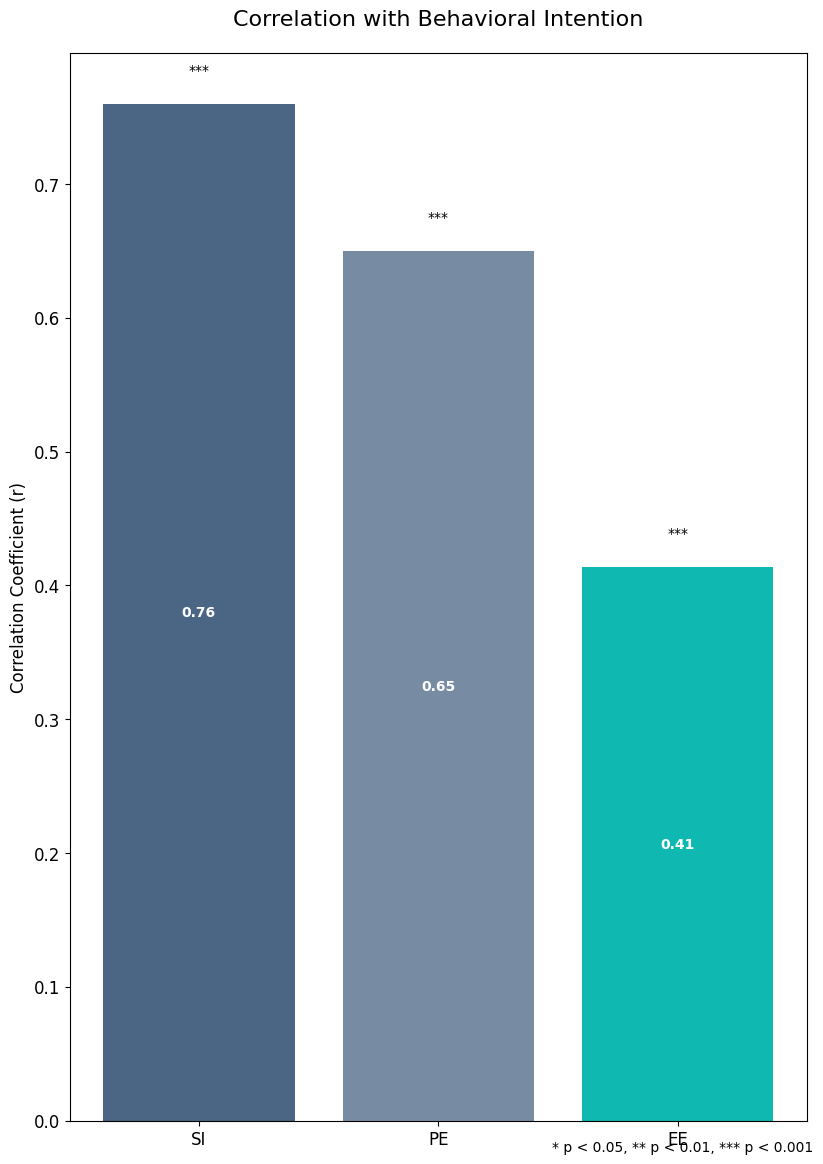


Correlation Analysis Results:

SI → Behavioral Intention:
  Correlation (r) = 0.760
  P-value = 0.0000

PE → Behavioral Intention:
  Correlation (r) = 0.650
  P-value = 0.0000

EE → Behavioral Intention:
  Correlation (r) = 0.413
  P-value = 0.0000


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm

# Load the data
df = pd.read_excel('mapped_survey_data.xlsx')

# Define columns for each construct
pe_columns = [
    'How beneficial do you think using FinBot/RAG will be for analyzing and retrieving financial reports?',
    'To what extent do you believe FinBot/RAG will improve the quality of your financial analysis?',
    'Do you think FinBot/RAG will help you make faster decisions based on financial reports?',
    'How important is it to you that the analysis and retrieval in FinBot/RAG are as accurate as human analysis?',
    'How likely are you to trust the AI-generated analysis in FinBot/RAG for decision-making?'
]

ee_columns = [
    'How easy do you expect it to be to use FinBot/RAG for analyzing and retrieving financial reports?',
    'How much effort do you think will be required to use FinBot/RAG effectively?',
    'Do you believe that FinBot/RAG will simplify the process of analyzing and retrieving lengthy financial reports?',
    'How comfortable are you with learning how to use FinBot/RAG?',
    'How intuitive do you find FinBot/RAGs user interface for both analysis and retrieval?'
]

si_columns = [
    'How likely is it that important people around you (friends, managers) would recommend using FinBot/RAG?',
    'To what extent do you believe using FinBot/RAG would make you more valuable to your organization?',
    'How much do you think your peers will rely on AI tools like FinBot/RAG in the future?',
    'Would you feel more inclined to use FinBot/RAG if your peers or colleagues were using it?',
    'How likely are you to use FinBot/RAG in your workplace if it becomes a standard tool?'
]

bi_columns = [
    'How likely are you to use FinBot/RAG for your analysis tasks in the future?',
    'Would you recommend FinBot/RAG to others in your field?',
    'Do you think FinBot/RAG will become an essential tool in financial reporting analysis and retrieval?',
    'How willing are you to replace human-based analysis with FinBot/RAG in your daily work?',
    'How likely are you to invest time in learning and mastering FinBot/RAG for improved productivity?'
]

# Calculate construct scores
def calculate_construct_scores(df, construct_columns):
    return df[construct_columns].mean(axis=1)

df['PE_Score'] = calculate_construct_scores(df, pe_columns)
df['EE_Score'] = calculate_construct_scores(df, ee_columns)
df['SI_Score'] = calculate_construct_scores(df, si_columns)
df['BI_Score'] = calculate_construct_scores(df, bi_columns)

# Calculate descriptive statistics
construct_scores = ['PE_Score', 'EE_Score', 'SI_Score', 'BI_Score']
descriptive_stats = df[construct_scores].describe()
print("\nDescriptive Statistics:")
print("=" * 50)
print(descriptive_stats)

# Calculate correlations and store in a dictionary
# Calculate correlations and create visualization
# Calculate correlations and create visualization
correlations = {}
for construct in ['PE_Score', 'EE_Score', 'SI_Score']:
    corr, p_value = pearsonr(df[construct], df['BI_Score'])
    correlations[construct] = {'Correlation': corr, 'P-value': p_value}

# Sort constructs by correlation strength
sorted_constructs = sorted(correlations.items(), 
                         key=lambda x: abs(x[1]['Correlation']), 
                         reverse=True)

# Create lists for plotting
constructs = [item[0].replace('_Score', '') for item in sorted_constructs]
corr_values = [item[1]['Correlation'] for item in sorted_constructs]
p_values = [item[1]['P-value'] for item in sorted_constructs]

# Create visualization
plt.figure(figsize=(8.27, 11.69))  # A4 size in inches
bars = plt.bar(constructs, corr_values, color=['#4b6584', '#778ca3', '#0fb9b1'])

# Add significance indicators and correlation values
for i, (v, p) in enumerate(zip(corr_values, p_values)):
    # Add correlation value
    plt.text(i, v/2, f'{v:.2f}', ha='center', va='center', 
             color='white', fontweight='bold', fontsize=10)
    
    # Add significance stars
    star_height = v + 0.02 if v >= 0 else v - 0.02
    if p < 0.001:
        plt.text(i, star_height, '***', ha='center', va='bottom', fontsize=10)
    elif p < 0.01:
        plt.text(i, star_height, '**', ha='center', va='bottom', fontsize=10)
    elif p < 0.05:
        plt.text(i, star_height, '*', ha='center', va='bottom', fontsize=10)

# Customize plot
plt.title('Correlation with Behavioral Intention', pad=20, fontsize=16)
plt.ylabel('Correlation Coefficient (r)', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.figtext(0.99, 0.02, '* p < 0.05, ** p < 0.01, *** p < 0.001', 
            ha='right', va='top', fontsize=10)

plt.tight_layout()
plt.show()

# Print results
print("\nCorrelation Analysis Results:")
print("=" * 40)
for construct, values in sorted_constructs:
    construct_name = construct.replace('_Score', '')
    print(f"\n{construct_name} → Behavioral Intention:")
    print(f"  Correlation (r) = {values['Correlation']:.3f}")
    print(f"  P-value = {values['P-value']:.4f}")

# Regression Analysis

In [42]:
import pandas as pd
import statsmodels.api as sm

# Load your data
df = pd.read_excel('mapped_survey_data.xlsx')

# Calculate mean scores for each construct if not already done
def calculate_construct_scores(df, construct_columns):
    return df[construct_columns].mean(axis=1)

# Define columns for each construct
pe_columns = [
    'How beneficial do you think using FinBot/RAG will be for analyzing and retrieving financial reports?',
    'To what extent do you believe FinBot/RAG will improve the quality of your financial analysis?',
    'Do you think FinBot/RAG will help you make faster decisions based on financial reports?',
    'How important is it to you that the analysis and retrieval in FinBot/RAG are as accurate as human analysis?',
    'How likely are you to trust the AI-generated analysis in FinBot/RAG for decision-making?'
]

ee_columns = [
    'How easy do you expect it to be to use FinBot/RAG for analyzing and retrieving financial reports?',
    'How much effort do you think will be required to use FinBot/RAG effectively?',
    'Do you believe that FinBot/RAG will simplify the process of analyzing and retrieving lengthy financial reports?',
    'How comfortable are you with learning how to use FinBot/RAG?',
    'How intuitive do you find FinBot/RAGs user interface for both analysis and retrieval?'
]

si_columns = [
    'How likely is it that important people around you (friends, managers) would recommend using FinBot/RAG?',
    'To what extent do you believe using FinBot/RAG would make you more valuable to your organization?',
    'How much do you think your peers will rely on AI tools like FinBot/RAG in the future?',
    'Would you feel more inclined to use FinBot/RAG if your peers or colleagues were using it?',
    'How likely are you to use FinBot/RAG in your workplace if it becomes a standard tool?'
]

bi_columns = [
    'How likely are you to use FinBot/RAG for your analysis tasks in the future?',
    'Would you recommend FinBot/RAG to others in your field?',
    'Do you think FinBot/RAG will become an essential tool in financial reporting analysis and retrieval?',
    'How willing are you to replace human-based analysis with FinBot/RAG in your daily work?',
    'How likely are you to invest time in learning and mastering FinBot/RAG for improved productivity?'
]

# Calculate construct scores
df['PE_Score'] = calculate_construct_scores(df, pe_columns)
df['EE_Score'] = calculate_construct_scores(df, ee_columns)
df['SI_Score'] = calculate_construct_scores(df, si_columns)
df['BI_Score'] = calculate_construct_scores(df, bi_columns)

# Define independent variables (add a constant term for intercept)
X = df[['PE_Score', 'EE_Score', 'SI_Score']]
X = sm.add_constant(X)

# Define dependent variable
y = df['BI_Score']

# Build the regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

# output coefficients
print(model.params)


                            OLS Regression Results                            
Dep. Variable:               BI_Score   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     61.98
Date:                Sat, 07 Dec 2024   Prob (F-statistic):           2.20e-23
Time:                        14:59:51   Log-Likelihood:                -68.385
No. Observations:                 112   AIC:                             144.8
Df Residuals:                     108   BIC:                             155.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1367      0.330      0.414      0.6